In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# **COVID-19 Twitter Sentiments**

# A. **Problem**: Do Twitter-tweet sentiments have any correlations with COVID19 death counts? That is, do states with higher death counts have a particular sentiment correlated to its tweets?


# **B. Datasets used**

## Tweet Source:
I constructed the twextual dataset by using a guide on twitter webscraping. I used the Twint library to construct a twitter webscraper that did not need to use Twitter's API. 
https://pypi.org/project/twint/ 

Twint allowed me to filter by tweet date, querey (keyword being COIVD19), number of tweets that are to be scraped, location of the tweet (state), and finally an output file in `.csv` of the scarped data.  

The code can be found on my github. The code may be ran in an UNIX-Based OS via terminal. If that's not possible, one could make an args data class and delete the argparse part from the code.

Code: https://github.com/kwxk/twitter-textual-scraper with comments for each line. 

Here is the general format for the crawler within the argparse of the code:

`python tweet_crawler -q [write here query] -d [write here since date] -c [write here how many tweets you want from each state] -s [provide here a list of states each state between quotation marks] -o [write here output file name]`

So for example: `python tweet_crawler -q covid19 -d 2020-01-01 -c 100 -s "New Jersey" "Florida" -o output.csv`

Tweets were collected from a year to date (Decemeber 01, 2021).

**I treated this as if it were an ETL pipeline.**

## **Tweet Dataset**

The main dataset must be split between states and english (en) tweets must be preserved in each dataset.

### **Main tweet data frame**

In [301]:
df = pd.read_csv('covid19.csv')
df.head()

,Unnamed: 0,username,tweet,link,date,language,near
0,0,StephenMeyerRDC,Haven’t slept 1 second yet thanks to the COVID...,https://twitter.com/StephenMeyerRDC/status/146...,2021-12-01 10:19:22,en,New Jersey
1,1,KazuMajiQueen,Jeez even the glory holes aren't safe from cov...,https://twitter.com/KazuMajiQueen/status/14659...,2021-12-01 09:52:13,en,New Jersey
2,2,Fury1184,Supporting humanitarian scientific research is...,https://twitter.com/Fury1184/status/1465919854...,2021-12-01 08:45:03,en,New Jersey
3,3,hoodietrades,@dingersandks @simplerusername @EricTopol Hosp...,https://twitter.com/hoodietrades/status/146591...,2021-12-01 08:23:18,en,New Jersey
4,4,_AJCarroll,"@IDeclareSuccess Dude, me too. After COVID las...",https://twitter.com/_AJCarroll/status/14659065...,2021-12-01 07:52:17,en,New Jersey


## **Split Tweet Dataframe (split by states)**

In [302]:
flp = df[df['near'].str.contains('Florida',na=False)]
fl = flp[flp['language'].str.contains('en',na=False)]
fl

,Unnamed: 0,username,tweet,link,date,language,near
1210,1210,affliction23,@yodjetpilot @ElectionWiz California is ranked...,https://twitter.com/affliction23/status/146594...,2021-12-01 10:06:56,en,Florida
1211,1211,TR76News,Germany's New Chancellor Says Mandatory Covid ...,https://twitter.com/TR76News/status/1465939852...,2021-12-01 10:04:31,en,Florida
1212,1212,AnthonyTalk,Dr. Tony Fauci belongs in jail @CNN #CNN . He ...,https://twitter.com/AnthonyTalk/status/1465935...,2021-12-01 09:47:53,en,Florida
1213,1213,DebB65762723,@Fight4usaNet @TonyHui99 More have died in 202...,https://twitter.com/DebB65762723/status/146593...,2021-12-01 09:45:33,en,Florida
1214,1214,TR76News,Biden Admin Considering Seven-Day Home Quarant...,https://twitter.com/TR76News/status/1465932010...,2021-12-01 09:33:21,en,Florida
...,...,...,...,...,...,...,...
3272,3272,NoLiarInChief,Hello from almost sunny Florida where Republic...,https://twitter.com/NoLiarInChief/status/14627...,2021-11-22 16:33:43,en,Florida
3273,3273,JCRaskaus,@MarySte83140111 @PattyButts No kidding the #C...,https://twitter.com/JCRaskaus/status/146277392...,2021-11-22 16:24:14,en,Florida
3274,3274,HankBuldawg,@Darth_Mommie Freaking terrible. My Uncle pass...,https://twitter.com/HankBuldawg/status/1462772...,2021-11-22 16:19:06,en,Florida
3275,3275,RaySchneid,"@CWSpackler @barbcraig7 I'm sorry, this is a t...",https://twitter.com/RaySchneid/status/14627721...,2021-11-22 16:17:22,en,Florida


In [303]:
txp = df[df['near'].str.contains('Texas',na=False)]
tx = txp[txp['language'].str.contains('en',na=False)]
tx

,Unnamed: 0,username,tweet,link,date,language,near
3277,3277,patriot4evva,LeBron James Forced To Isolate Under NBA Covid...,https://twitter.com/patriot4evva/status/146595...,2021-12-01 10:55:37,en,Texas
3278,3278,Keds1250878727,How interesting. They also made record profits...,https://twitter.com/Keds1250878727/status/1465...,2021-12-01 10:54:05,en,Texas
3279,3279,autodilla,WATCH: Dan Bongino reveals details of painful ...,https://twitter.com/autodilla/status/146595028...,2021-12-01 10:45:58,en,Texas
3280,3280,Keds1250878727,But its Biden’s fault we’re still dealing with...,https://twitter.com/Keds1250878727/status/1465...,2021-12-01 10:41:47,en,Texas
3281,3281,MaryMary0414,@xj6response @dingersandks @EricTopol I notice...,https://twitter.com/MaryMary0414/status/146594...,2021-12-01 10:36:55,en,Texas
...,...,...,...,...,...,...,...
8286,8286,MangusColorado,Mortality Rate Among European Cancer Patients ...,https://twitter.com/MangusColorado/status/1463...,2021-11-25 17:48:55,en,Texas
8287,8287,WixomAndrew,@PervertedWriter @jacquel19826381 @steveyzzzz ...,https://twitter.com/WixomAndrew/status/1463882...,2021-11-25 17:48:04,en,Texas
8288,8288,O341Marine,@6ximsm @eyebeesteve @Jim_Jordan Again. What w...,https://twitter.com/O341Marine/status/14638819...,2021-11-25 17:47:08,en,Texas
8289,8289,iloanya1,So don't let em get away with it...any Republi...,https://twitter.com/iloanya1/status/1463881876...,2021-11-25 17:46:51,en,Texas


In [304]:
njp = df[df['near'].str.contains('New Jersey',na=False)]
njp = njp[njp['language'].str.contains('en',na=False)]
nj

,Unnamed: 0,username,tweet,link,date,language,near
0,0,StephenMeyerRDC,Haven’t slept 1 second yet thanks to the COVID...,https://twitter.com/StephenMeyerRDC/status/146...,2021-12-01 10:19:22,en,New Jersey
1,1,KazuMajiQueen,Jeez even the glory holes aren't safe from cov...,https://twitter.com/KazuMajiQueen/status/14659...,2021-12-01 09:52:13,en,New Jersey
2,2,Fury1184,Supporting humanitarian scientific research is...,https://twitter.com/Fury1184/status/1465919854...,2021-12-01 08:45:03,en,New Jersey
3,3,hoodietrades,@dingersandks @simplerusername @EricTopol Hosp...,https://twitter.com/hoodietrades/status/146591...,2021-12-01 08:23:18,en,New Jersey
4,4,_AJCarroll,"@IDeclareSuccess Dude, me too. After COVID las...",https://twitter.com/_AJCarroll/status/14659065...,2021-12-01 07:52:17,en,New Jersey
...,...,...,...,...,...,...,...
1205,1205,selvynk,Whoever wins in #trinidadandtobago General Ele...,https://twitter.com/selvynk/status/12921868967...,2020-08-08 22:52:18,en,New Jersey
1206,1206,dbookee,"And I’m the midst of all the COVID-19 chaos, t...",https://twitter.com/dbookee/status/12898819344...,2020-08-02 14:13:12,en,New Jersey
1207,1207,popstarjames,Geera pork #foodporn #food #kitchennazi #covid...,https://twitter.com/popstarjames/status/128539...,2020-07-21 05:03:01,pt,New Jersey
1208,1208,MsAKing,Despite the covid putting a pause on construct...,https://twitter.com/MsAKing/status/12820460852...,2020-07-11 23:16:20,en,New Jersey


In [305]:
nyp = df[df['near'].str.contains('New York',na=False)]
ny = nyp[nyp['language'].str.contains('en',na=False)]
ny

,Unnamed: 0,username,tweet,link,date,language,near
8291,8291,gamezbyte,Opinion | Let’s End the Covid Blame Games - Th...,https://twitter.com/gamezbyte/status/146595282...,2021-12-01 10:56:04,en,New York
8292,8292,AENMAD,@MarcScottEmery Me too. And I can’t catch Cov...,https://twitter.com/AENMAD/status/146595269990...,2021-12-01 10:55:34,en,New York
8293,8293,TuSaludMag,FDA Advisors Recommend Antiviral Pill for Earl...,https://twitter.com/TuSaludMag/status/14659525...,2021-12-01 10:55:08,en,New York
8294,8294,kylenabecker,@CosmoS6173 Lesson of the day: Never turn in y...,https://twitter.com/kylenabecker/status/146595...,2021-12-01 10:55:08,en,New York
8295,8295,pozmagazine,FDA Advisors Recommend Antiviral Pill for Earl...,https://twitter.com/pozmagazine/status/1465952...,2021-12-01 10:54:56,en,New York
...,...,...,...,...,...,...,...
13292,13292,PageSix,Keira Knightley 'feeling pretty rubbish' after...,https://twitter.com/PageSix/status/14654859937...,2021-11-30 04:01:02,en,New York
13293,13293,interpretantion,I suppose maybe there'd be some stalemate if t...,https://twitter.com/interpretantion/status/146...,2021-11-30 04:01:00,en,New York
13294,13294,WSJ,Waiting longer between the first and second do...,https://twitter.com/WSJ/status/146548582033327...,2021-11-30 04:00:21,en,New York
13296,13296,Power1051,The World Health Organization said the new omi...,https://twitter.com/Power1051/status/146548573...,2021-11-30 04:00:01,en,New York


## **Stopwords**

In [306]:
### Stopwords List
stop= open("stopwords.txt").read().replace("\n",' ').split(" ")[:-1]

In [307]:
stat = pd.read_csv('us-states.csv')
stat

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
35673,2021-12-09,Virginia,51,991221,14868
35674,2021-12-09,Washington,53,791832,9584
35675,2021-12-09,West Virginia,54,304355,5055
35676,2021-12-09,Wisconsin,55,1017528,10330


In [308]:
ny_stat = stat[stat['state'].str.contains('New York',na=False)]
nystat2 = ny_stat.drop(['fips','cases','state'], axis = 1)

In [309]:
nj_stat = stat[stat['state'].str.contains('New Jersey',na=False)]
njstat2 = nj_stat.drop(['fips','cases','state'], axis = 1)

In [310]:
tx_stat = stat[stat['state'].str.contains('Texas',na=False)]
txstat2 = tx_stat.drop(['fips','cases','state'], axis = 1)

In [311]:
fl_stat = stat[stat['state'].str.contains('Florida',na=False)]
flstat2 = fl_stat.drop(['fips','cases','state'], axis = 1)

In [312]:
fl_stat = stat[stat['state'].str.contains('Florida',na=False)]
fl_stat

,date,state,fips,cases,deaths
242,2020-03-01,Florida,12,2,0
255,2020-03-02,Florida,12,2,0
270,2020-03-03,Florida,12,3,0
286,2020-03-04,Florida,12,3,0
304,2020-03-05,Florida,12,4,0
...,...,...,...,...,...
35408,2021-12-05,Florida,12,3699624,61701
35464,2021-12-06,Florida,12,3702338,61789
35520,2021-12-07,Florida,12,3704013,61789
35576,2021-12-08,Florida,12,3705899,61789


## **Sentiment Analysis**

In [315]:
from nltk.stem.wordnet import WordNetLemmatizer
from gensim import corpora, models
from nltk.tokenize import word_tokenize
import gensim
#import pyLDAvis.gensim_models as gensimvis
from gensim import corpora
from matplotlib.patches import Rectangle
import pandas as pd
import numpy as np
import nltk
nltk.downloader.download('vader_lexicon')
nltk.downloader.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud 
import itertools
import collections
import re
import nltk
from nltk.corpus import stopwords
import re
import networkx
from textblob import TextBlob


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [316]:
df1= df.copy()
df1.drop(["Unnamed: 0","username","link","language"],axis=1, inplace=True)
df1

,tweet,date,near
0,Haven’t slept 1 second yet thanks to the COVID...,2021-12-01 10:19:22,New Jersey
1,Jeez even the glory holes aren't safe from cov...,2021-12-01 09:52:13,New Jersey
2,Supporting humanitarian scientific research is...,2021-12-01 08:45:03,New Jersey
3,@dingersandks @simplerusername @EricTopol Hosp...,2021-12-01 08:23:18,New Jersey
4,"@IDeclareSuccess Dude, me too. After COVID las...",2021-12-01 07:52:17,New Jersey
...,...,...,...
13294,Waiting longer between the first and second do...,2021-11-30 04:00:21,New York
13295,#Conciertos|La iniciativa procura celebrar la ...,2021-11-30 04:00:02,New York
13296,The World Health Organization said the new omi...,2021-11-30 04:00:01,New York
13297,"Presidente de #Sudáfrica, 🇿🇦 #CyrilRamaphosa, ...",2021-11-30 04:00:00,New York


In [317]:
def cleaner(text):
    text = re.sub("@[A-Za-z0-9]+","",text)
    text = re.sub("#[A-Za-z0-9]+","",text)#Remove @ sign
    text = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", text) #Remove http links
    text = text.replace("\n", "")
    text=text.lower()
    return text
df1['tweet'] = df1['tweet'].map(lambda x: cleaner(x))

In [318]:
punct = "\n\r"+string.punctuation
df1['tweet'] = df1['tweet'].str.translate(str.maketrans('','',punct))

In [319]:
def clean_sentence(val):
    "remove chars that are not letters or number or down case then remove"
    regex=re.compile('([^\sa-zA-Z0-9]|_)+')
    sentence=regex.sub('',val).lower()
    sentence = sentence.replace('\n'," ")
    sentence = sentence.replace(','," ")
    sentence = sentence.replace('\\~'," ")
    sentence = sentence.replace('QAQ\\~\\~'," ")
    sentence=sentence.split(" ")
    for word in list(sentence):
        if word in  stop:
            sentence.remove(word)
    sentence=" ".join(sentence)
    return sentence


In [320]:
def clean_dataframe(data):
    "drop nans,thenb apply clean sentence function to description"
#     data=data.dropna(how="any")

    for col in ['tweet']:
        df1[col]=df1[col].apply(clean_sentence)
    return df1
cleaned_text = clean_dataframe(df1)

In [321]:
# Create textblob objects of the tweets
sentiment_objects = [TextBlob(text) for text in df1['tweet']]

sentiment_objects[2].polarity, sentiment_objects[0]
sentiment_values = [[text.sentiment.polarity, str(text)] for text in sentiment_objects]
sentiment_df = pd.DataFrame(sentiment_values, columns=["polarity", "tweet"])

a=sentiment_df['polarity'].round(2)


In [322]:
b=list(a)
sentiment_df['Polar']=b
new_list=[]
for i in range(len(sentiment_df['Polar'])):
    a = sentiment_df['Polar'][i] 
    if a == 0:
        new_list.append("Neutral")
        continue
    if a >0:
        new_list.append("Positive")
        continue
    if a <0:
        new_list.append("Negative")
        continue

In [323]:
sentiment_df['Sentiments']=new_list
sentiment_df

,polarity,tweet,Polar,Sentiments
0,0.500,havent slept 1 covidflu vax combo feel death 1...,0.50,Positive
1,0.500,jeez glory holes arent safe covid,0.50,Positive
2,0.325,supporting humanitarian scientific research im...,0.32,Positive
3,0.100,hospitalization death covid facts straight mor...,0.10,Positive
4,0.000,dude covid breath lungs sooooooooooo,0.00,Neutral
...,...,...,...,...
13294,0.000,waiting longer doses covid19 vaccine build imm...,0.00,Neutral
13295,0.000,la iniciativa procura celebrar la importancia ...,0.00,Neutral
13296,0.080,world health organization omicron variant covi...,0.08,Positive
13297,0.000,presidente de frica ha denunciado las prohibic...,0.00,Neutral


In [324]:
df1['Sentiments']=sentiment_df['Sentiments']
df1['Polar']=sentiment_df['Polar']


In [325]:
df1

,tweet,date,near,Sentiments,Polar
0,havent slept 1 covidflu vax combo feel death 1...,2021-12-01 10:19:22,New Jersey,Positive,0.50
1,jeez glory holes arent safe covid,2021-12-01 09:52:13,New Jersey,Positive,0.50
2,supporting humanitarian scientific research im...,2021-12-01 08:45:03,New Jersey,Positive,0.32
3,hospitalization death covid facts straight mor...,2021-12-01 08:23:18,New Jersey,Positive,0.10
4,dude covid breath lungs sooooooooooo,2021-12-01 07:52:17,New Jersey,Neutral,0.00
...,...,...,...,...,...
13294,waiting longer doses covid19 vaccine build imm...,2021-11-30 04:00:21,New York,Neutral,0.00
13295,la iniciativa procura celebrar la importancia ...,2021-11-30 04:00:02,New York,Neutral,0.00
13296,world health organization omicron variant covi...,2021-11-30 04:00:01,New York,Positive,0.08
13297,presidente de frica ha denunciado las prohibic...,2021-11-30 04:00:00,New York,Neutral,0.00


## **Florida Sentiments Analysis**


In [326]:
df_fl= df1[df1['near']=="Florida"].reset_index(drop=True)
df_fl

,tweet,date,near,Sentiments,Polar
0,california ranked 35th state guidelines initia...,2021-12-01 10:06:56,Florida,Negative,-0.27
1,germanys chancellor mandatory covid jabs wave,2021-12-01 10:04:31,Florida,Neutral,0.00
2,dr tony fauci belongs jail responsible deaths ...,2021-12-01 09:47:53,Florida,Negative,-0.04
3,died 2021 vaccines entire died covid 2020 vacc...,2021-12-01 09:45:33,Florida,Neutral,0.00
4,biden admin sevenday home quarantine americans...,2021-12-01 09:33:21,Florida,Negative,-0.30
...,...,...,...,...,...
2062,sunny florida republicans led hitler wannabe s...,2021-11-22 16:33:43,Florida,Neutral,0.00
2063,kidding 38 effective covid 995 survivable pree...,2021-11-22 16:24:14,Florida,Positive,0.60
2064,mommie freaking terrible uncle passed covid li...,2021-11-22 16:19:06,Florida,Negative,-0.54
2065,im thing happened shed allowed share anecdotal...,2021-11-22 16:17:22,Florida,Negative,-0.70


## **New York Sentiments Analysis**


In [327]:
df_ny= df1[df1['near']=="New York"].reset_index(drop=True)
df_ny

,tweet,date,near,Sentiments,Polar
0,opinion lets end covid blame games york times,2021-12-01 10:56:04,New York,Neutral,0.00
1,catch covid,2021-12-01 10:55:34,New York,Neutral,0.00
2,fda advisors recommend antiviral pill early co...,2021-12-01 10:55:08,New York,Positive,0.10
3,lesson turn guns government circumstances less...,2021-12-01 10:55:08,New York,Negative,-0.80
4,fda advisors recommend antiviral pill early co...,2021-12-01 10:54:56,New York,Positive,0.10
...,...,...,...,...,...
5003,waiting longer doses covid19 vaccine build imm...,2021-11-30 04:00:21,New York,Neutral,0.00
5004,la iniciativa procura celebrar la importancia ...,2021-11-30 04:00:02,New York,Neutral,0.00
5005,world health organization omicron variant covi...,2021-11-30 04:00:01,New York,Positive,0.08
5006,presidente de frica ha denunciado las prohibic...,2021-11-30 04:00:00,New York,Neutral,0.00


## **New Jersy Sentiments Analysis**


In [328]:
df_nj= df1[df1['near']=="New Jersey"].reset_index(drop=True)
df_nj

,tweet,date,near,Sentiments,Polar
0,havent slept 1 covidflu vax combo feel death 1...,2021-12-01 10:19:22,New Jersey,Positive,0.50
1,jeez glory holes arent safe covid,2021-12-01 09:52:13,New Jersey,Positive,0.50
2,supporting humanitarian scientific research im...,2021-12-01 08:45:03,New Jersey,Positive,0.32
3,hospitalization death covid facts straight mor...,2021-12-01 08:23:18,New Jersey,Positive,0.10
4,dude covid breath lungs sooooooooooo,2021-12-01 07:52:17,New Jersey,Neutral,0.00
...,...,...,...,...,...
1205,wins general election 10th august 2020 love co...,2020-08-08 22:52:18,New Jersey,Positive,0.28
1206,im midst covid19 chaos sun shines flowers bloo...,2020-08-02 14:13:12,New Jersey,Positive,0.80
1207,geera pork 19 couva,2020-07-21 05:03:01,New Jersey,Neutral,0.00
1208,covid putting pause construction back work com...,2020-07-11 23:16:20,New Jersey,Neutral,0.00


## **Texas Sentiments Analysis**


In [329]:
df_tx= df1[df1['near']=="Texas"].reset_index(drop=True)
df_tx

,tweet,date,near,Sentiments,Polar
0,lebron james forced isolate nba covid protocol...,2021-12-01 10:55:37,Texas,Negative,-0.04
1,interesting made record profits beginning covi...,2021-12-01 10:54:05,Texas,Positive,0.50
2,watch dan bongino reveals details painful brea...,2021-12-01 10:45:58,Texas,Negative,-0.70
3,bidens fault dealing covid dont americans wont...,2021-12-01 10:41:47,Texas,Neutral,0.00
4,noticed youre canada canada handled pandemic f...,2021-12-01 10:36:55,Texas,Neutral,0.00
...,...,...,...,...,...
5009,mortality rate european cancer patients contra...,2021-11-25 17:48:55,Texas,Neutral,0.00
5010,glass died play science statistics incentives ...,2021-11-25 17:48:04,Texas,Neutral,0.00
5011,jordan differently covid claim trump fumbled,2021-11-25 17:47:08,Texas,Neutral,0.00
5012,dont em itany republican rise covid cases made...,2021-11-25 17:46:51,Texas,Neutral,0.00


# **C. Findings:**

## **Overall Sentiments among all states**



In [330]:
## Visualizing the Text sentiments 

pos=df1[df1['Sentiments']=='Positive']
neg=df1[df1['Sentiments']=='Negative']

neu=df1[df1['Sentiments']=='Neutral']

import plotly.express as px
#Frist_Day = Frist_Day
fig = px.pie(df1, names='Sentiments')
fig.show()

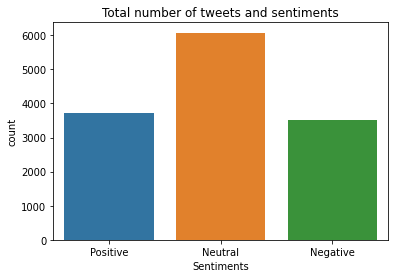

In [344]:
plt.title('Total number of tweets and sentiments')
plt.xlabel('Emotions')
plt.ylabel('Number of Tweets')
sns.countplot(x='Sentiments', data=df1)

**Finding: Neutral Sentiments are the most prevalent of sentiments from the combine dataframe of NJ, NY, FL, TX tweets. There are slightly more positive sentiments than negative sentiments.**

In [236]:
df1['near'].unique()

array(['New Jersey', 'Florida', 'Texas', 'New York'], dtype=object)

## **Barplot for the Sentiments (New Jersey)**

<BarContainer object of 3 artists>

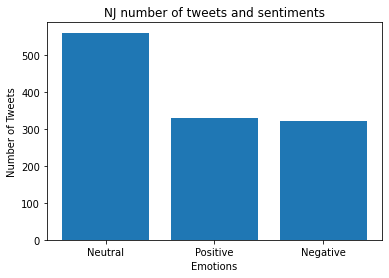

In [331]:
b=df_nj['Sentiments'].value_counts().reset_index()
plt.title('NJ number of tweets and sentiments')
plt.xlabel('Emotions')
plt.ylabel('Number of Tweets')
plt.bar(x=b['index'], height=b['Sentiments'])

**Findings:  New Jersey has a majority neutral sentiment tweets from the dataframe. It has slightly more positive sentiment tweets than there are negative sentiment tweets.**

## **Barplot for the Sentiments (New York)**

<BarContainer object of 3 artists>

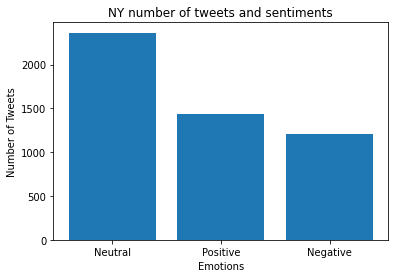

In [332]:
b=df_ny['Sentiments'].value_counts().reset_index()
plt.title('NY number of tweets and sentiments')
plt.xlabel('Emotions')
plt.ylabel('Number of Tweets')
plt.bar(x=b['index'], height=b['Sentiments'])

**Findings: New York has a majority neutral sentiment tweets from the dataframe. It has more positive sentiment tweets than there are negative sentiment tweets.**

In [333]:
stat

,date,state,fips,cases,deaths
0,2020-01-21,Washington,53,1,0
1,2020-01-22,Washington,53,1,0
2,2020-01-23,Washington,53,1,0
3,2020-01-24,Illinois,17,1,0
4,2020-01-24,Washington,53,1,0
...,...,...,...,...,...
35673,2021-12-09,Virginia,51,991221,14868
35674,2021-12-09,Washington,53,791832,9584
35675,2021-12-09,West Virginia,54,304355,5055
35676,2021-12-09,Wisconsin,55,1017528,10330


In [334]:
df1

,tweet,date,near,Sentiments,Polar
0,havent slept 1 covidflu vax combo feel death 1...,2021-12-01 10:19:22,New Jersey,Positive,0.50
1,jeez glory holes arent safe covid,2021-12-01 09:52:13,New Jersey,Positive,0.50
2,supporting humanitarian scientific research im...,2021-12-01 08:45:03,New Jersey,Positive,0.32
3,hospitalization death covid facts straight mor...,2021-12-01 08:23:18,New Jersey,Positive,0.10
4,dude covid breath lungs sooooooooooo,2021-12-01 07:52:17,New Jersey,Neutral,0.00
...,...,...,...,...,...
13294,waiting longer doses covid19 vaccine build imm...,2021-11-30 04:00:21,New York,Neutral,0.00
13295,la iniciativa procura celebrar la importancia ...,2021-11-30 04:00:02,New York,Neutral,0.00
13296,world health organization omicron variant covi...,2021-11-30 04:00:01,New York,Positive,0.08
13297,presidente de frica ha denunciado las prohibic...,2021-11-30 04:00:00,New York,Neutral,0.00


In [335]:
import datetime
lst=[]
#df1['date'] = datetime.datetime.strptime(df1['date'], '%Y-%m-%d' )
for i in range(len(df1)):
  dat= datetime.datetime.strptime(df1['date'][i],  '%Y-%m-%d %H:%M:%S')
  df1['date'][i]= dat.date()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [336]:
df1.sort_values(by='date').reset_index(drop=True)

,tweet,date,near,Sentiments,Polar
0,hoy toca ir madrid 19 en san fernando,2020-07-08,New Jersey,Neutral,0.00
1,covid putting pause construction back work com...,2020-07-11,New Jersey,Neutral,0.00
2,geera pork 19 couva,2020-07-21,New Jersey,Neutral,0.00
3,im midst covid19 chaos sun shines flowers bloo...,2020-08-02,New Jersey,Positive,0.80
4,wins general election 10th august 2020 love co...,2020-08-08,New Jersey,Positive,0.28
...,...,...,...,...,...
13294,nazi propaganda state media blames unvaccinate...,2021-12-01,New York,Negative,-0.07
13295,publicity stunt covid19 faxenews,2021-12-01,New York,Neutral,0.00
13296,300 school cases doe announced tonight school ...,2021-12-01,New York,Positive,0.40
13297,picking dead bodies city streets rapid test po...,2021-12-01,New York,Positive,0.01


In [337]:
a= ['New Jersey', 'Florida', 'Texas', 'New York']
lst=[]
for i in range(len(stat)):
  if stat['state'][i] in a:
    lst.append(i)
df_stat= stat.iloc[lst].reset_index(drop=True)

In [338]:
df_stat

,date,state,fips,cases,deaths
0,2020-02-12,Texas,48,1,0
1,2020-02-13,Texas,48,2,0
2,2020-02-14,Texas,48,2,0
3,2020-02-15,Texas,48,2,0
4,2020-02-16,Texas,48,2,0
...,...,...,...,...,...
2606,2021-12-08,Texas,48,4356555,74685
2607,2021-12-09,Florida,12,3708204,62007
2608,2021-12-09,New Jersey,34,1289542,28526
2609,2021-12-09,New York,36,2816974,57507


## **Barplot for the Sentiments (Texas)**

<BarContainer object of 3 artists>

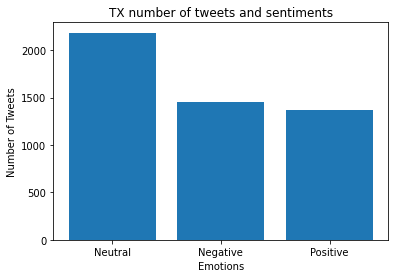

In [339]:
b=df_tx['Sentiments'].value_counts().reset_index()
plt.title('TX number of tweets and sentiments')
plt.xlabel('Emotions')
plt.ylabel('Number of Tweets')
plt.bar(x=b['index'], height=b['Sentiments'])

**Findings: Texas has a majority neutral sentiment tweets from the dataframe. It has slightly more negative sentiment tweets than there are positive sentiment tweets.**

## **Barplot for the Sentiments (Florida)**

<BarContainer object of 3 artists>

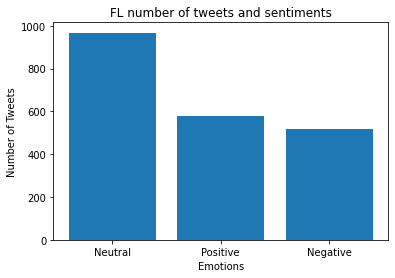

In [340]:
b=df_fl['Sentiments'].value_counts().reset_index()
plt.title('FL number of tweets and sentiments')
plt.xlabel('Emotions')
plt.ylabel('Number of Tweets')
plt.bar(x=b['index'], height=b['Sentiments'])

**Findings: Florida has a majority neutral sentiment tweets from the dataframe. It has slightly more positive sentiment tweets than there are negative sentiment tweets.**

# **Total Covid Deaths Year to Date (Decemeber 4th)**

---
Source: https://github.com/nytimes/covid-19-data 


In [345]:
import plotly.express as px
fig = px.line(df_stat, x='date', y='deaths', color='state')
fig.show()

The above graph shows the total covid deaths from 02/13/2020 until 12/04/2021 for the states of Texas, Florida, New York, and New Jersey. Texas and Florida have the two most deaths with Texas leading. New York and New Jersey have the least deaths with New York leading New Jersey with the most deaths out of the two.  

## **Initial Questions ▶**

1. **Would it stand to reason that the states with more positive-neutral sentiments toward COVID-19 had lower total deaths?**

There are no correlations between tweet sentiments and total deaths according to the curated dataset. Looking at the CSV dataset from the New York Times' Github on the total COVID-19 deaths for the states of Texas, Florida, New York, and New Jersey, it shows that Texas and Florida are top out of the states in terms of the total death count. Texas and Florida had different Positive to Negative sentiments as is apparent from the graph.

  

2. **Which state had a higher infection death count?**

Texas has the higher death count out of all of the states. New Jersey has the least.

3. **Which states had more negative than positive twitter sentiment to 'COVID-19' in their dataset?**

Texas was the only state that had more negative twitter sentiments in its dataset than positive.


4. **What was the most common sentiment in all datasets?**

Neutral sentiment tweet was the most popular category having much of the tweets in the total dataset: 45.7% of textual data was neutral. 28% of the total textual dataset was positive in sentiment and 26.3% was negative.


5. **Are the sentiment results correlated or related to total death count?**

  No. There are no correlations/realtions between sentiment and total death counts. In the Texas dataset, its graph observed more negative sentiments than positive. In the Florida dataset, its graph observed more positive sentiments than negative.

 
  If we look at New Jersey and New York, both datasets have more positive than negative sentiment tweets. New York has considerably more positive tweets than negative tweets. NJ has slightly more positive tweets than negative tweets.

  If we wanted to make a statement that states that have more positive tweets to negative tweets have higher total death counts, Texas would have to have that same trend. Texas breaks this trend such that there are more negative tweets than positive tweets in its dataset despite it having the highest total death count out of all of the states.




In [342]:
## Visualizing the Text sentiments 

pos=df1[df1['Sentiments']=='Positive']
neg=df1[df1['Sentiments']=='Negative']

neu=df1[df1['Sentiments']=='Neutral']

import plotly.express as px
#Frist_Day = Frist_Day
fig = px.pie(df1, names='Sentiments')
fig.show()

# **D. Implications**

**For the hiring firm:**

According to the dataset, twitter sentiments alone cannot give any meaningful indication as to whether or not tweets and their emotions have any bearing on COVID-19's death total death count. Better methodologies must be made: perhaps tweets of a certain popularity (perhaps a ratio between likes, retweets, sharing, etc) should be curated into a dataset. Simply looking at tweets at random is a good measure against bias however there is too much statistical noise within the dataset to make any meaningful correlations.

**For Social Science:**

Better methodologies in general should be developed when looking at social media posts. Considerable weight should be given to popular/viral content when curating a dataset as that is a category of data that inherently has the most interaction and 'social proof' due to its popularity on the website.

# **E. Learning Outcomes**

The more I developed my analytical skills, the more I realized that my project had a lot of statsitcal noise. First, I should have developed a better methodolgy for curating tweets. I simply used TWINT to currated 1300+ tweets randomly according to a fixed criteria. I did not add factors such as popularity of a tweet or its general social-media interaction score (primarily because I do not know how to do that yet). 

If I were to do this project again, I would start off by curating textual data that had a certain virality to it. I would alone curate tweets with specific likes, shares, and comments. 

This would be a difficult task, as I don't know if twitter has an ELO score for tweets: If twitter had a virality ratio for a tweet I would likely curate on that factor as it would come from a class of textual data that has genderated a certain amount of influence. 

However, this would add additional questions that would have to be considered as well: How much of the virality score would be coming from a particular state? 

For instance, if a score of 10 is VERY viral and that tweet comes from New York, are New York twitter users responsible for that tweet being a score of 10 or could it be users from another geographic location? This is a fair question because I would want to know how much influence the tweet has in its geographic location. It may be possible to develope a webscraper capable of achieving this goal, but It may involve many calculations that still would not gaurantee the results being adequately parsed.